In [1]:
from utils import convert_boardtomatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split





def filter_string(str_arr, regex): 
    p = re.compile(regex)
    return [ s for s in str_arr if p.match(s) ]

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
start_cols = filter_string(df.columns, 'start')
stop_cols = filter_string(df.columns, 'stop')

In [4]:
X = df[start_cols][:10000].to_numpy()
Y = df[stop_cols][:10000].to_numpy()

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train = x_train.reshape([-1, 25, 25, 1])
x_train = np.array([convert_boardtomatrix(tm.reshape([25, 25])) for tm in x_train]).reshape([-1, 25, 25, 1])
x_test = np.array([convert_boardtomatrix(tm.reshape([25, 25])) for tm in x_test]).reshape([-1, 25, 25, 1])

In [76]:
from tensorflow.keras import models, layers, losses
def build_CNN():
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(25, 25, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (2, 2), activation='relu'))
    model.add(layers.LSTM(300))
    model.add(layers.Flatten())
    model.add(layers.Dense(625, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='MSE',
              metrics=['accuracy'])
    return model

In [77]:
model = build_CNN()
model.summary()

ValueError: Input 0 of layer lstm_1 is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: [None, 10, 10, 16]

In [72]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1295 - accuracy: 0.0054 - val_loss: 0.1163 - val_accuracy: 0.0063
Epoch 2/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1101 - accuracy: 0.0097 - val_loss: 0.1126 - val_accuracy: 0.0110
Epoch 3/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1049 - accuracy: 0.0129 - val_loss: 0.1115 - val_accuracy: 0.0107
Epoch 4/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1008 - accuracy: 0.0159 - val_loss: 0.1117 - val_accuracy: 0.0130
Epoch 5/10
219/219 [==============================] - 3s 14ms/step - loss: 0.0970 - accuracy: 0.0171 - val_loss: 0.1131 - val_accuracy: 0.0120
Epoch 6/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0933 - accuracy: 0.0206 - val_loss: 0.1146 - val_accuracy: 0.0147
Epoch 7/10
219/219 [==============================] - 3s 14ms/step - loss: 0.0897 - accuracy: 0.0244 - val_loss: 0.1171 - val_accuracy: 0.0133

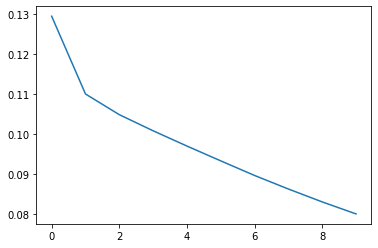

In [73]:
plt.plot(history.history['loss'])